In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
#import dataset

placement_data = pd.read_csv("Placement_Data_Full_Class.csv")

In [ ]:
placement_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
placement_data_copy = placement_data.copy()

In [ ]:
#exploring data

placement_data_copy.shape


(215, 15)

In [ ]:
placement_data_copy.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [ ]:
# Handling Missing values
placement_data_copy.isnull().sum()


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
placement_data_copy['salary'].fillna(value = 0, inplace = True)

In [ ]:
placement_data_copy.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
# Cleaning the data, removing the columns which are not needed

placement_data_copy.drop(['sl_no', 'ssc_b', 'hsc_b'], axis = 1, inplace = True)

In [ ]:
placement_data_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Text(0.5, 1.0, 'Employability Percentage')

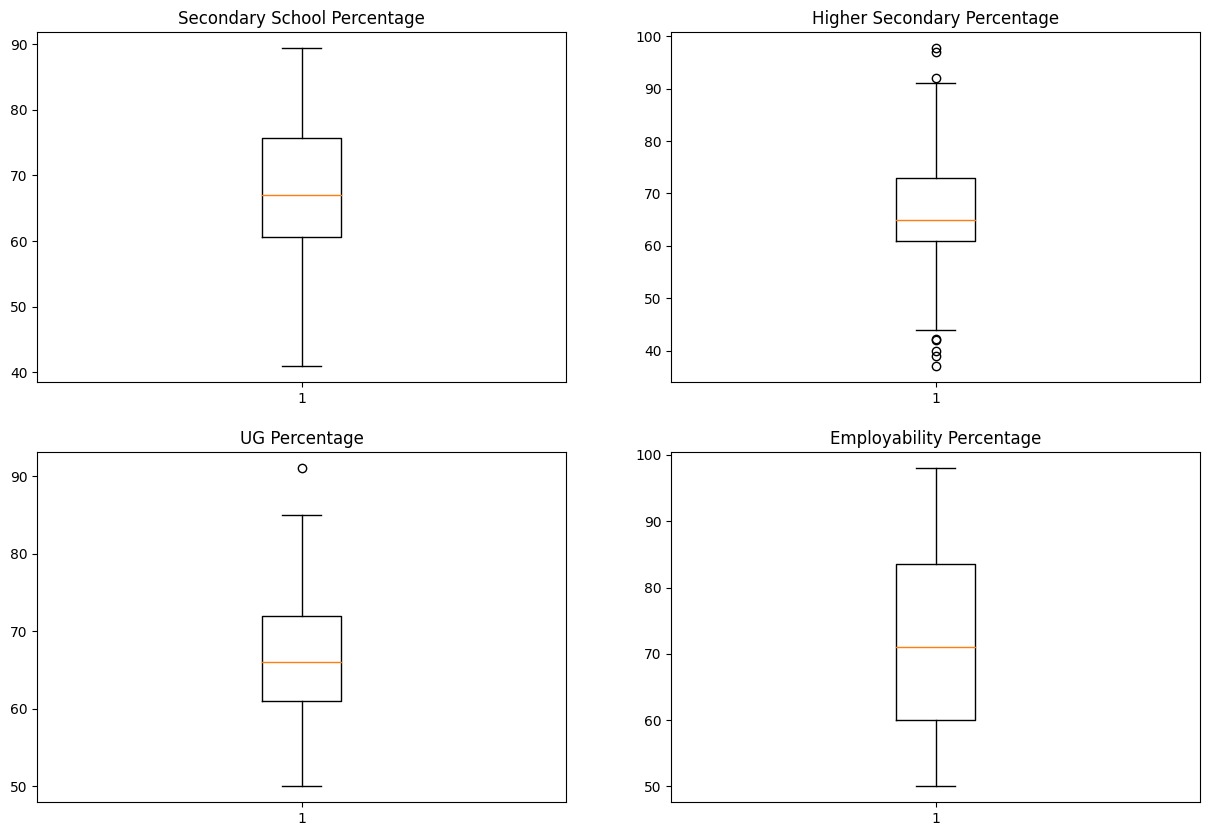

In [ ]:
# Handling outliers in the data

plt.figure(figsize = (15, 10))

ax = plt.subplot(221)
plt.boxplot(placement_data_copy['ssc_p'])
ax.set_title("Secondary School Percentage")

ax = plt.subplot(222)
plt.boxplot(placement_data_copy['hsc_p'])
ax.set_title("Higher Secondary Percentage")

ax = plt.subplot(223)
plt.boxplot(placement_data_copy['degree_p'])
ax.set_title("UG Percentage")

ax = plt.subplot(224)
plt.boxplot(placement_data_copy['etest_p'])
ax.set_title("Employability Percentage")

In [ ]:
Q1 = placement_data_copy['hsc_p'].quantile(0.25)
Q3 = placement_data_copy['hsc_p'].quantile(0.75)

IQR = Q3-Q1

filter = (placement_data_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_data_copy['hsc_p'] <= Q3 + 1.5 * IQR)

filtered_placement_data = placement_data_copy.loc[filter]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc7f46fb580>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc7f46fbac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc7f46fb2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc7f472c040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc7f472c2e0>],
 'means': []}

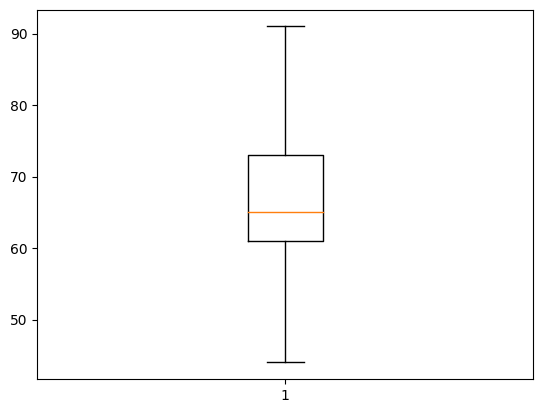

In [ ]:
plt.boxplot(filtered_placement_data['hsc_p'])

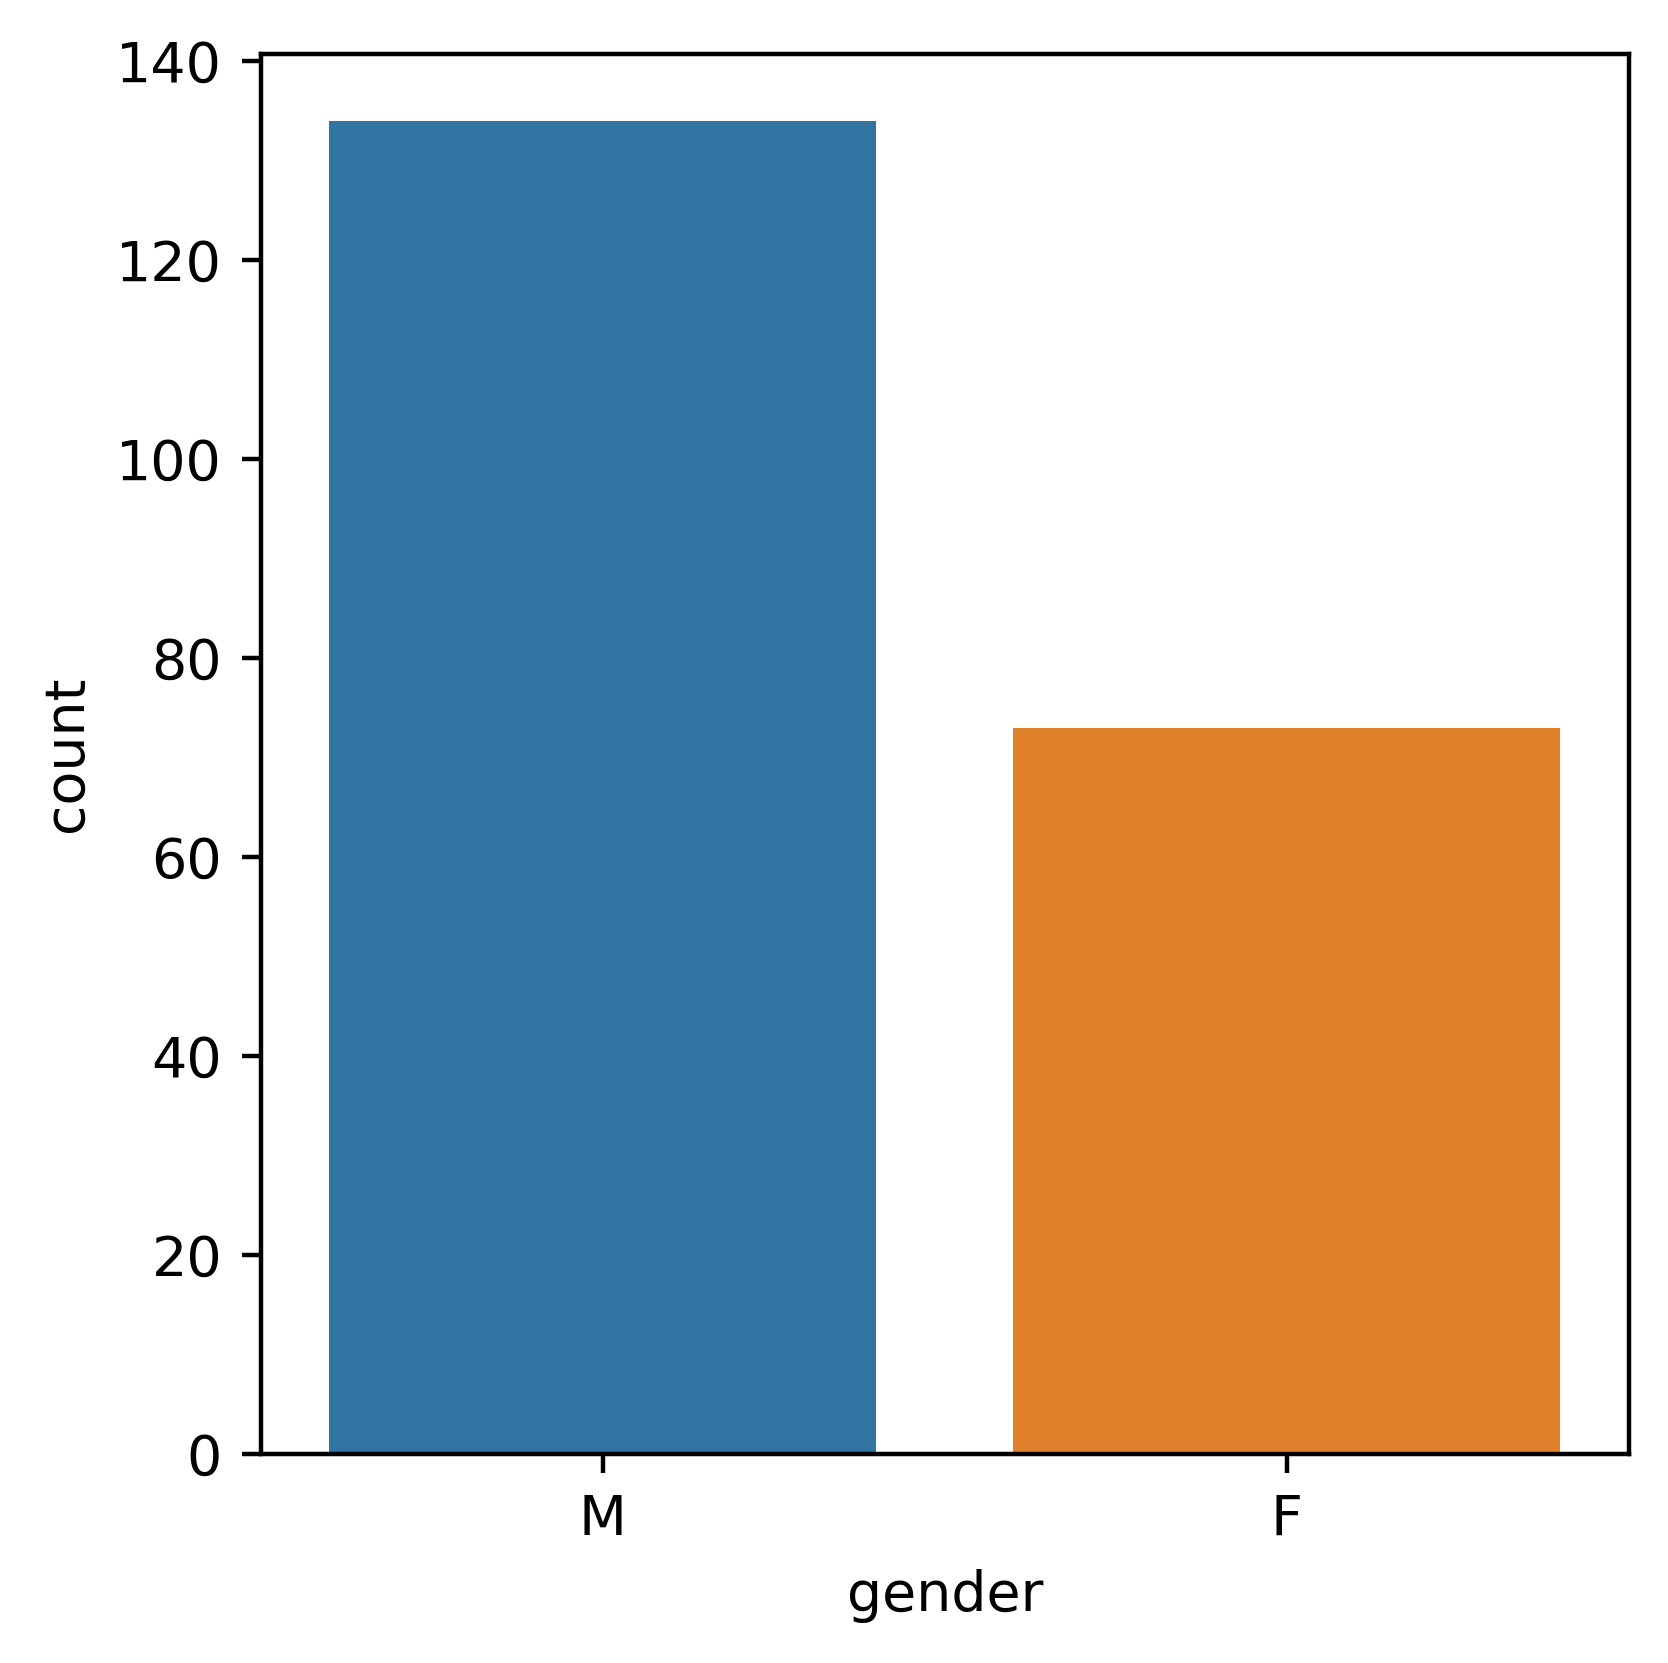

In [ ]:
#visualization of data

plt.figure(figsize = (15, 10), dpi = 400)

plt.subplot(231)
ax = sns.countplot(x = 'gender', data = filtered_placement_data)

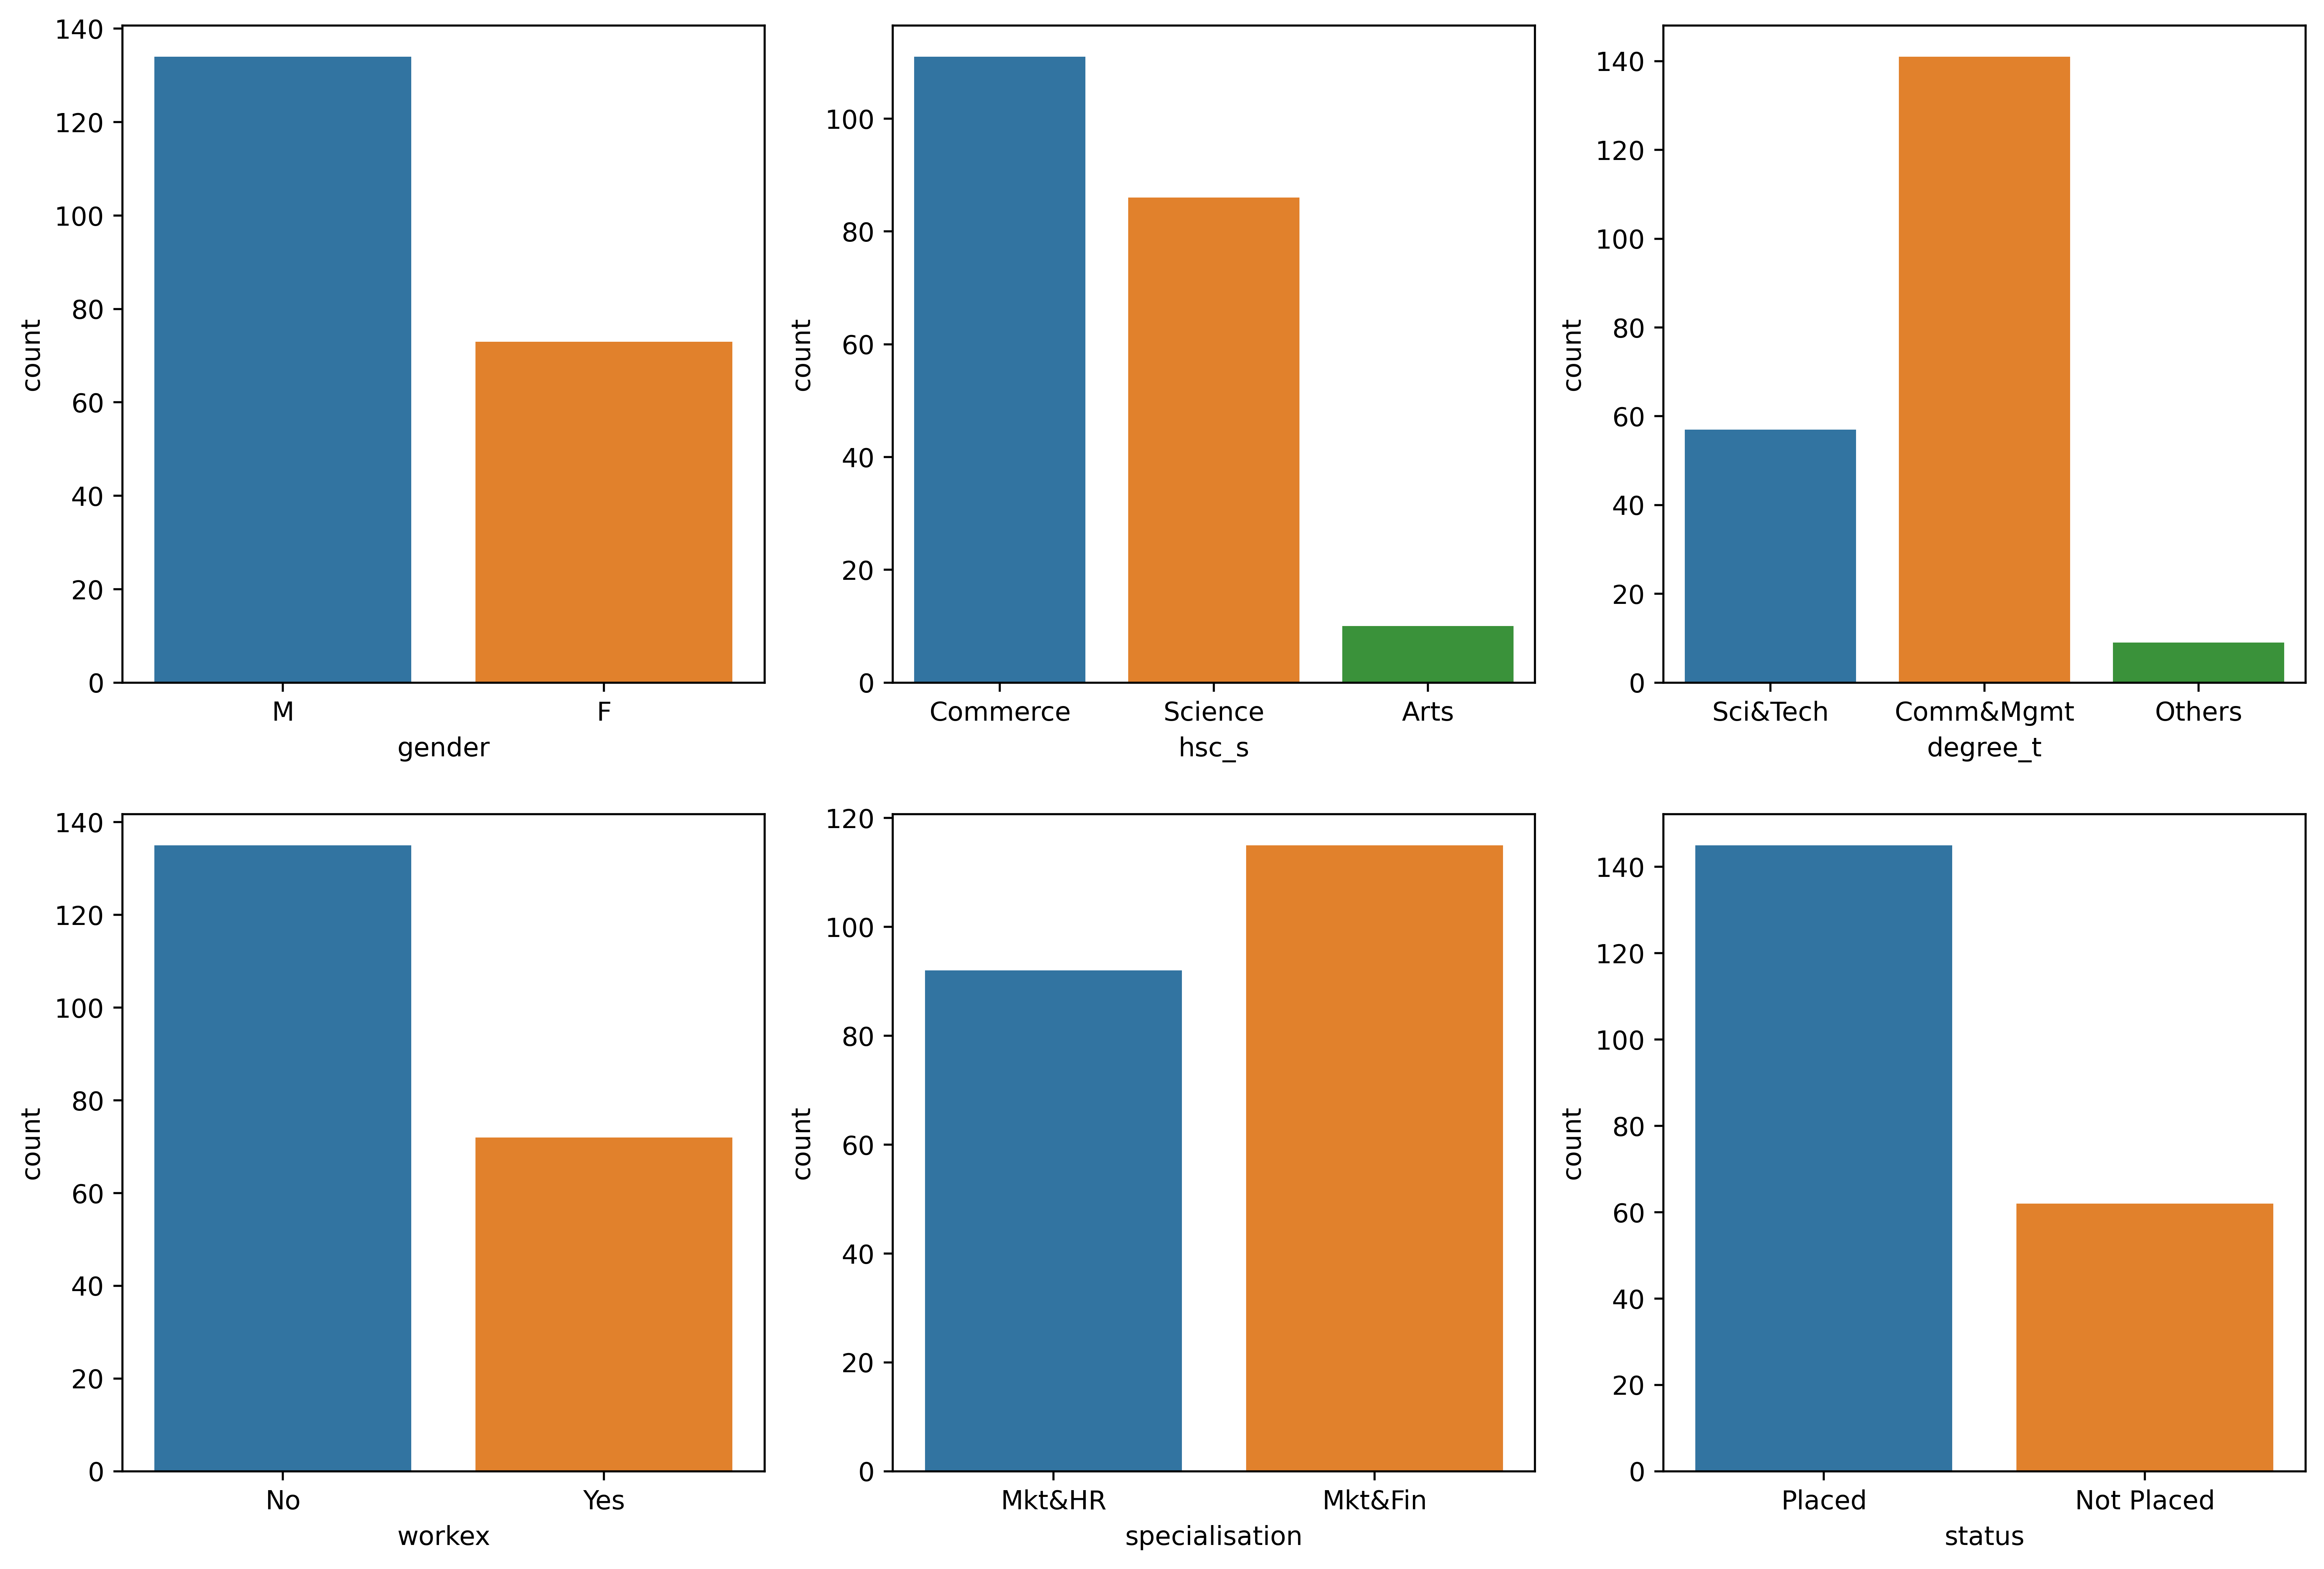

In [ ]:
plt.figure(figsize = (15, 10), dpi = 500)

plt.subplot(231)
ax = sns.countplot(x = 'gender', data = filtered_placement_data)

plt.subplot(232)
ax = sns.countplot(x = 'hsc_s', data = filtered_placement_data)

plt.subplot(233)
ax = sns.countplot(x = 'degree_t', data = filtered_placement_data)

plt.subplot(234)
ax = sns.countplot(x = 'workex', data = filtered_placement_data)

plt.subplot(235)
ax = sns.countplot(x = 'specialisation', data = filtered_placement_data)

plt.subplot(236)
ax = sns.countplot(x = 'status', data = filtered_placement_data)


<Axes: xlabel='salary', ylabel='Count'>

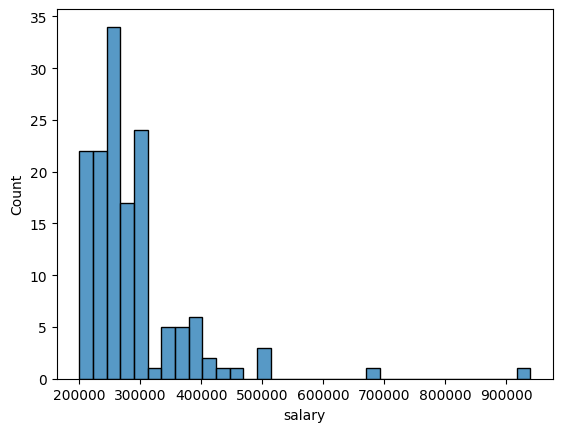

In [ ]:
placed_data = filtered_placement_data[filtered_placement_data.salary!=0]
sns.histplot(placed_data, x = 'salary')

In [ ]:
filtered_placement_data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
import plotly.express as px

px.violin(filtered_placement_data, y='salary', x = 'specialisation', color = 'gender', box = True, points = 'all')

We can see a gender bias is done here because more males are hired than females who have done the same degree.

In [ ]:
placement_data_copy.head(10)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,M,55.00,49.80,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,F,46.00,49.20,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
7,M,82.00,64.00,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,M,73.00,79.00,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,M,58.00,70.00,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0


In [ ]:
# Encoding Character Variables

# label encoding
from sklearn.preprocessing import LabelEncoder

object_cols = ['gender', 'workex', 'specialisation', 'status']

label_encoder = LabelEncoder()

for col in object_cols:
  filtered_placement_data[col] = label_encoder.fit_transform(filtered_placement_data[col])

filtered_placement_data.head(15)

<ipython-input-21-6bb90cd51cc6>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-6bb90cd51cc6>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-6bb90cd51cc6>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-6bb9

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.00,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.50,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.00,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.00,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.80,0,55.50,1,425000.0
5,1,55.00,49.80,Science,67.25,Sci&Tech,1,55.00,0,51.58,0,0.0
6,0,46.00,49.20,Commerce,79.00,Comm&Mgmt,0,74.28,0,53.29,0,0.0
7,1,82.00,64.00,Science,66.00,Sci&Tech,1,67.00,0,62.14,1,252000.0
8,1,73.00,79.00,Commerce,72.00,Comm&Mgmt,0,91.34,0,61.29,1,231000.0
9,1,58.00,70.00,Commerce,61.00,Comm&Mgmt,0,54.00,0,52.21,0,0.0


In [ ]:
#  One Hot Encoding

dummy_hsc_s = pd.get_dummies(filtered_placement_data['hsc_s'], prefix = 'dummy')
dummy_degree_t = pd.get_dummies(filtered_placement_data['degree_t'], prefix = 'dummy')

placement_coded = pd.concat([filtered_placement_data, dummy_hsc_s, dummy_degree_t], axis = 1)
placement_coded.drop(['hsc_s', 'degree_t', 'salary'], axis = 1, inplace = True)
placement_coded.head(15)

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.00,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.50,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.00,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.00,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.80,0,55.50,1,0,1,0,1,0,0
5,1,55.00,49.80,67.25,1,55.00,0,51.58,0,0,0,1,0,0,1
6,0,46.00,49.20,79.00,0,74.28,0,53.29,0,0,1,0,1,0,0
7,1,82.00,64.00,66.00,1,67.00,0,62.14,1,0,0,1,0,0,1
8,1,73.00,79.00,72.00,0,91.34,0,61.29,1,0,1,0,1,0,0
9,1,58.00,70.00,61.00,0,54.00,0,52.21,0,0,1,0,1,0,0


In [ ]:
X = placement_coded.drop(['status'], axis = 1)
y = placement_coded.status

In [ ]:
num_male_placed = len(placement_coded[(placement_coded['gender'] == 1) & (placement_coded['status'] == 1)])
num_male_not_placed = len(placement_coded[(placement_coded['gender'] == 1) & (placement_coded['status'] == 0)])

percent_male_placed = num_male_placed/(num_male_placed+num_male_not_placed)
likeFraction_male_placed = (num_male_placed*73)/((num_male_placed+num_male_not_placed)*73)

print(num_male_placed*73)
print((num_male_placed+num_male_not_placed)*73)
print(likeFraction_male_placed)
print()


num_female_placed = len(placement_coded[(placement_coded['gender'] == 0) & (placement_coded['status'] == 1)])
num_female_not_placed = len(placement_coded[(placement_coded['gender'] == 0) & (placement_coded['status'] == 0)])

likeFraction_female_placed = (num_female_placed*134)/((num_female_placed+num_female_not_placed)*134)

print(num_female_placed*134)
print((num_female_placed+num_female_not_placed)*134)
print(likeFraction_female_placed)

7227
9782
0.7388059701492538

6164
9782
0.6301369863013698


In [ ]:
num_sp_placed = len(placement_coded[(placement_coded['specialisation'] == 0) & (placement_coded['status'] == 0)])
print(f"Number of students placed: {num_sp_placed}")

Number of students placed: 23


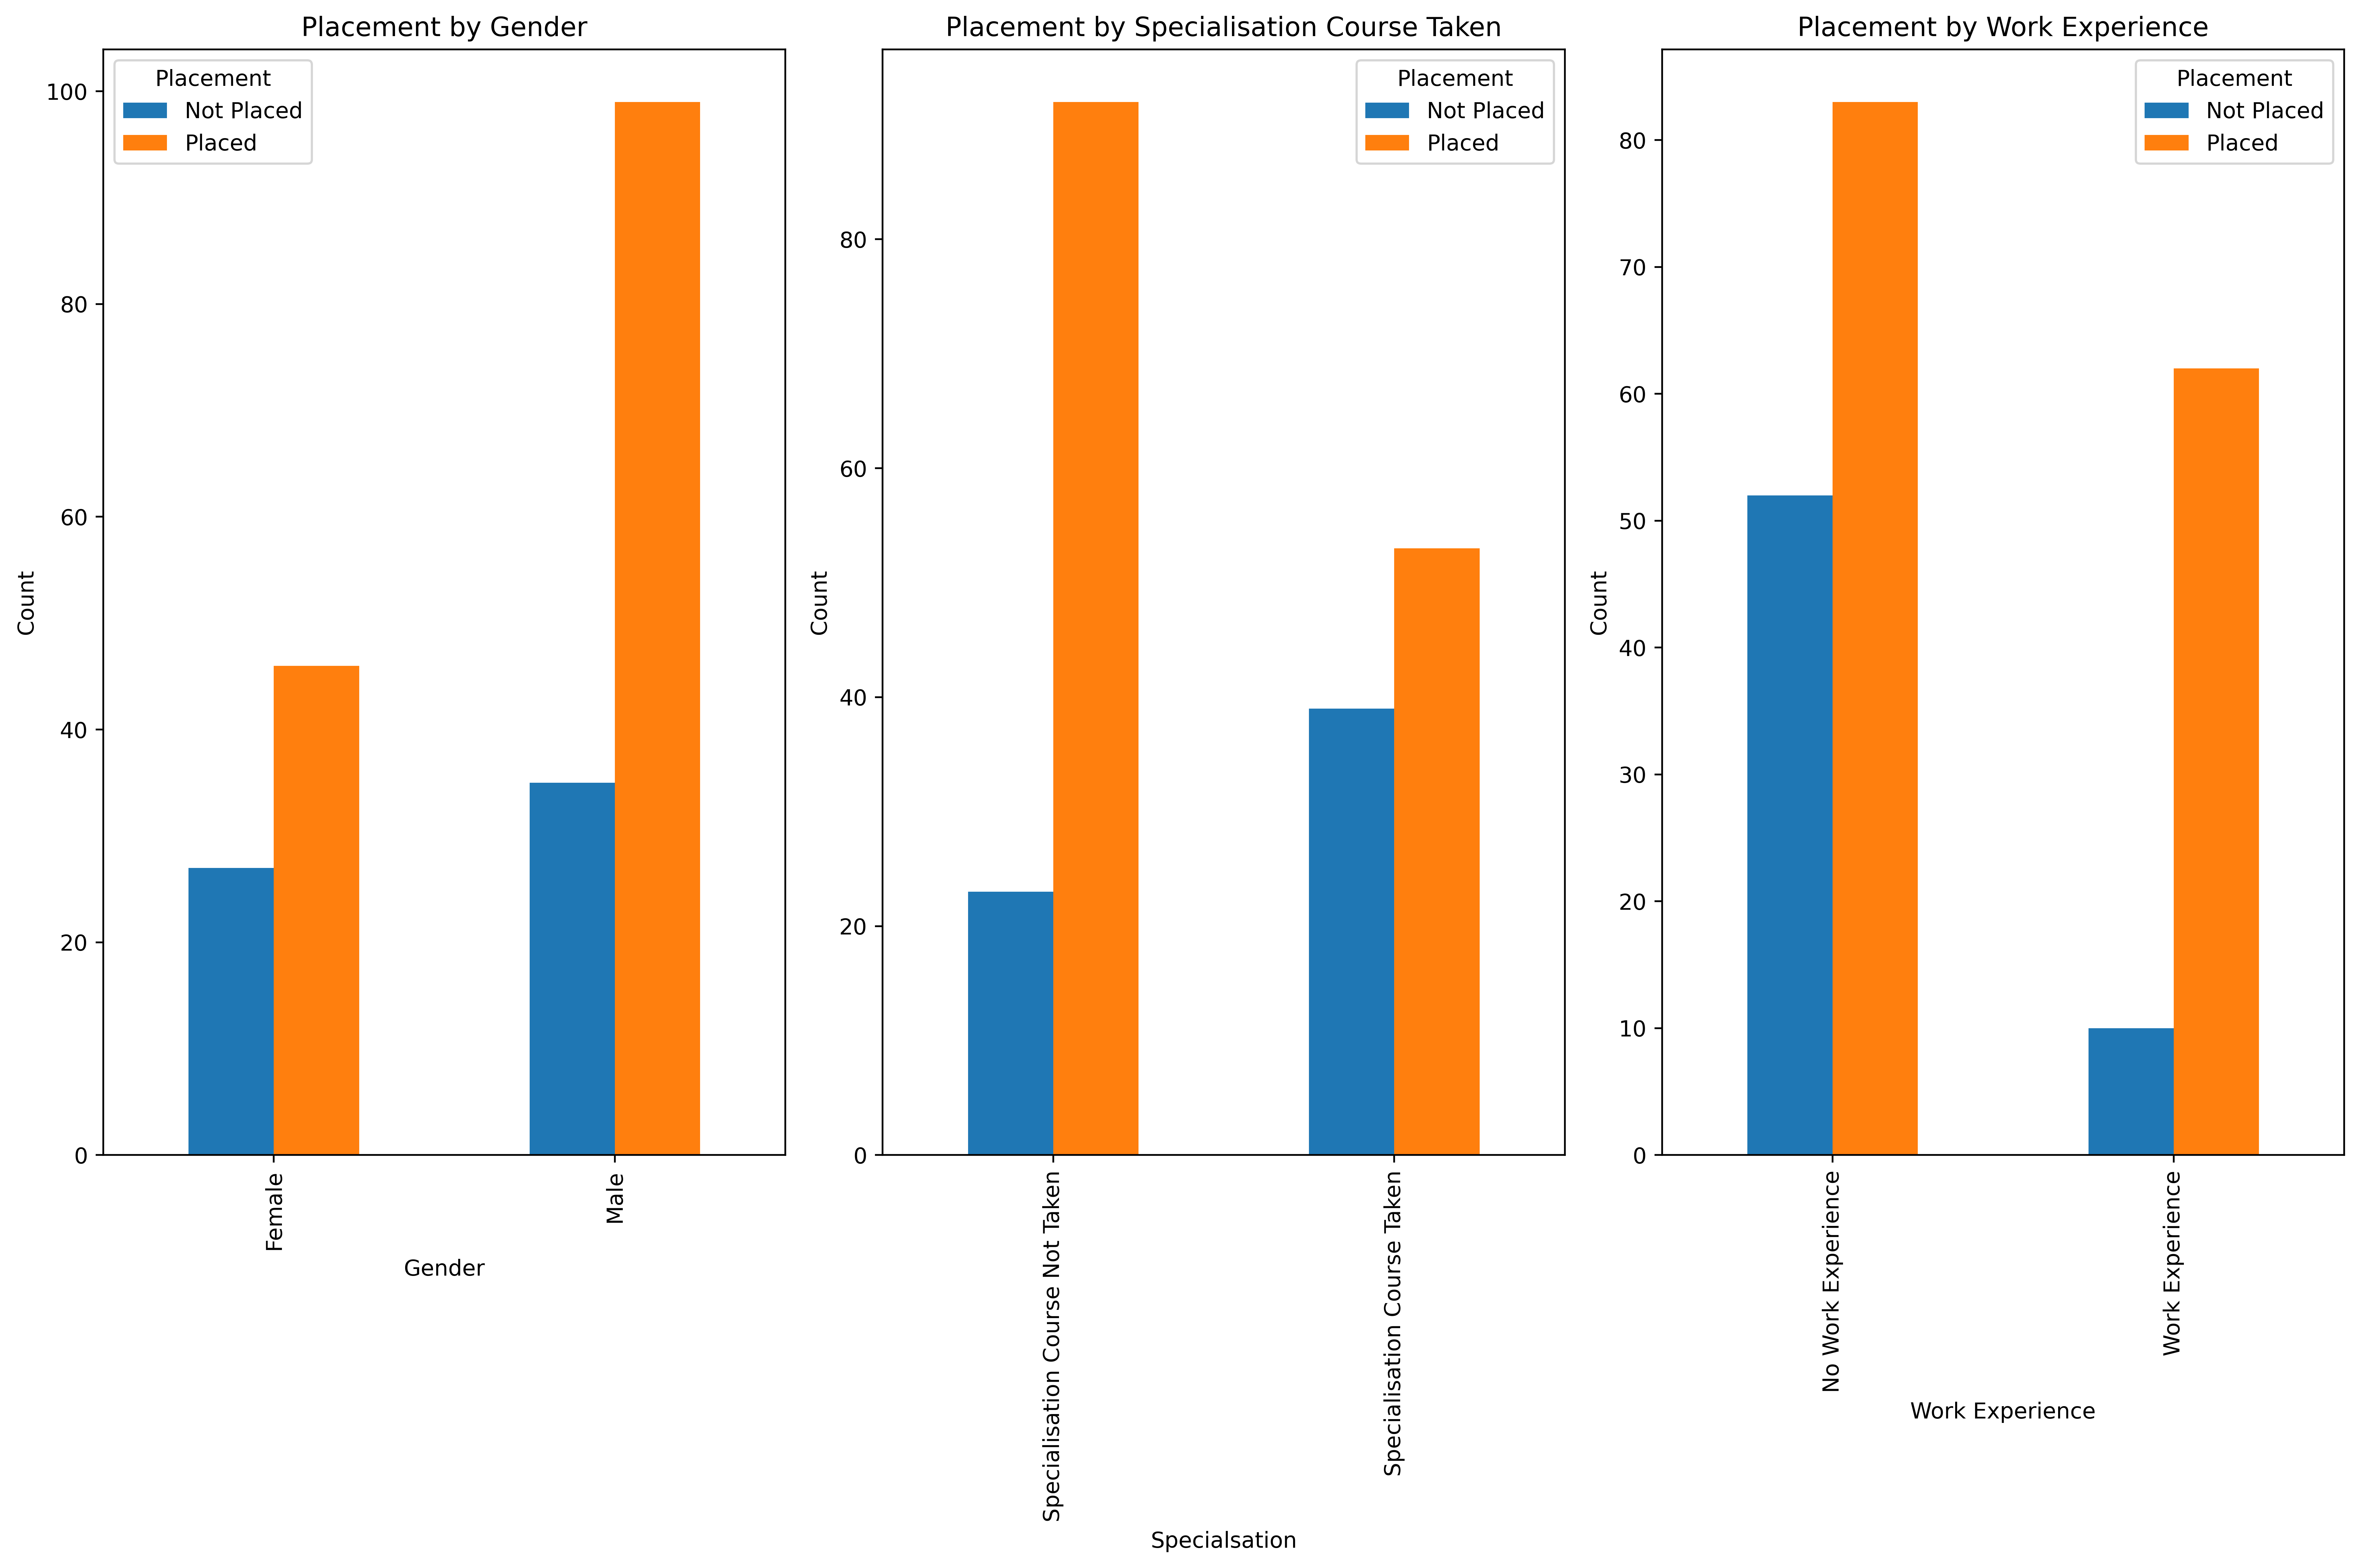

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (15, 10), dpi = 500)


placement_coded.groupby('gender')['status'].value_counts().unstack().plot(kind='bar', stacked=False, ax=axs[0])
axs[0].set_title('Placement by Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')
axs[0].legend(title='Placement', labels=['Not Placed', 'Placed'])
axs[0].set_xticks([0, 1], ['Female', 'Male'])
# plt.show()


placement_coded.groupby('specialisation')['status'].value_counts().unstack().plot(kind='bar', stacked=False, ax=axs[1])
axs[1].set_title('Placement by Specialisation Course Taken')
axs[1].set_xlabel('Specialsation')
axs[1].set_ylabel('Count')
axs[1].legend(title='Placement', labels=['Not Placed', 'Placed'])
axs[1].set_xticks([0, 1], ['Specialisation Course Not Taken', 'Specialisation Course Taken'])
# plt.show()


placement_coded.groupby('workex')['status'].value_counts().unstack().plot(kind='bar', stacked=False, ax=axs[2])
axs[2].set_title('Placement by Work Experience')
axs[2].set_xlabel('Work Experience')
axs[2].set_ylabel('Count')
axs[2].legend(title='Placement', labels=['Not Placed', 'Placed'])
axs[2].set_xticks([0, 1], ['No Work Experience', 'Work Experience'])

plt.tight_layout()
plt.show()

In [ ]:
correlation = filtered_placement_data['ssc_p'].corr(filtered_placement_data['status'])

print("Pearson correlatin coefficient", correlation)

Pearson correlatin coefficient 0.586772202025273


<Axes: >

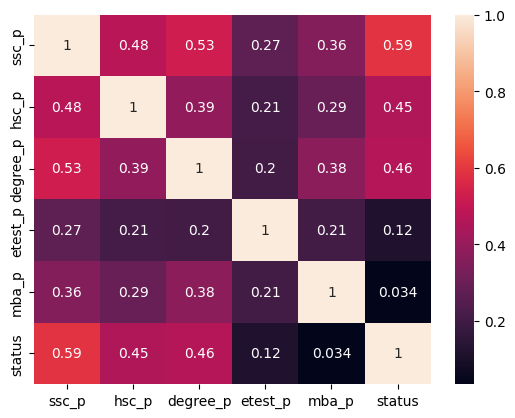

In [ ]:
corr = filtered_placement_data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status']].corr()
sns.heatmap(corr, annot=True)

<Axes: >

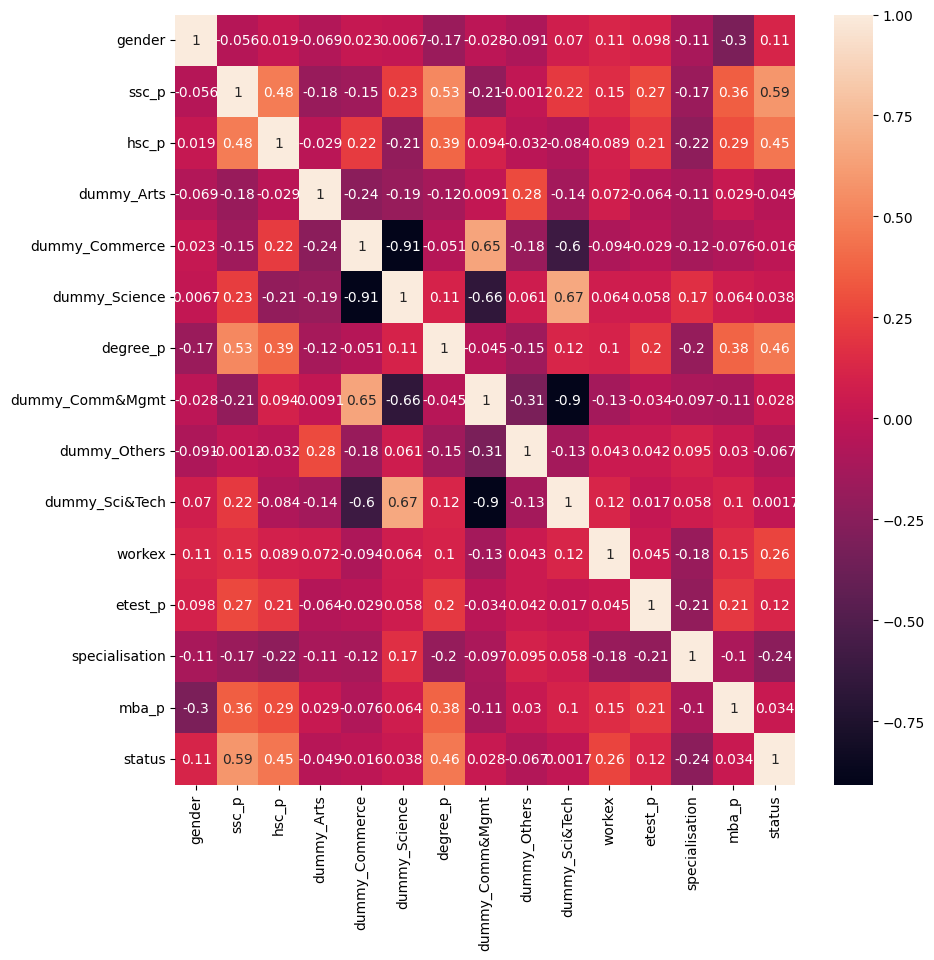

In [ ]:
corr = placement_coded[['gender', 'ssc_p', 'hsc_p', 'dummy_Arts', 'dummy_Commerce', 'dummy_Science', 'degree_p', 'dummy_Comm&Mgmt', 'dummy_Others', 'dummy_Sci&Tech', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status']].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

In [ ]:
max_marks_male = placement_coded[(placement_coded['gender'] == 0) & (placement_coded['status'] == 0)]['ssc_p'].max()

print("Maximum marks obtained by a male student:", max_marks_male)

Maximum marks obtained by a male student: 77.8


In [ ]:

px.violin(placement_coded.replace({'gender': {0: 'Female', 1:'Male'}, 'status': {0: 'Not Placed', 1: 'Placed'}}), x='status', y='ssc_p', color='gender', box=True, points='all')

In [ ]:
feature_matrix = placement_coded.drop(['status'], axis = 1)
target = placement_coded['status']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

# Assume X is your feature matrix and y is your target variable
scaler = StandardScaler()
feature_matrix_std = scaler.fit_transform(feature_matrix)

logistic = LogisticRegression(penalty='l1', solver='liblinear')

selector = SelectFromModel(logistic)
selector.fit(feature_matrix_std, target)

selected_features = feature_matrix.columns[selector.get_support()]

print(selected_features)

Index(['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'dummy_Arts', 'dummy_Commerce',
       'dummy_Comm&Mgmt', 'dummy_Sci&Tech'],
      dtype='object')


In [ ]:
placement_coded_new = placement_coded[['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'dummy_Arts', 'dummy_Commerce', 'dummy_Comm&Mgmt', 'dummy_Sci&Tech']]

placement_coded_new.head()
# target.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,dummy_Arts,dummy_Commerce,dummy_Comm&Mgmt,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,0,1,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,0,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,0,1,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(placement_coded_new, target, train_size = 0.74, random_state = 1)

print('Training set size', len(X_train))
print('Testing set size', len(X_test))

Training set size 153
Testing set size 54


In [ ]:
# Logistic Regression
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, logreg_pred)

print(logreg.score(X_test, y_test))
print('Accuracy', accuracy)

0.8333333333333334
Accuracy 0.8333333333333334


In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

SVM_Model = SVC(gamma = 'auto')
SVM_Model.fit(X_train, y_train)


SVC(gamma='auto')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, dt_pred))

Accuracy 0.7777777777777778


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

rt.fit(X_train, y_train)

rt_pred = rt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, rt_pred))

Accuracy 0.7962962962962963


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(placement_coded_new, target, train_size = 0.80, random_state = 40)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)

logreg_l2 = LogisticRegression(penalty='l2', C=0.1)

logreg_l1.fit(X_train, y_train)
logreg_l2.fit(X_train, y_train)

print('L1 regularization score:', logreg_l1.score(X_test, y_test))
print('L2 regularization score:', logreg_l2.score(X_test, y_test))

L1 regularization score: 0.7857142857142857
L2 regularization score: 0.8095238095238095


In [ ]:
from sklearn.model_selection import GridSearchCV

# L1 regularization
param_grid_l1 = {'C': [0.01, 0.1, 1, 5, 10, 100]}
grid_l1 = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid_l1, cv=5)
grid_l1.fit(X_train, y_train)
print('Best C for L1 regularization:', grid_l1.best_params_['C'])
print('L1 regularization score after tuning:', grid_l1.score(X_test, y_test))

# L2 regularization
param_grid_l2 = {'C': [0.01, 0.1, 1, 5, 10, 100]}
grid_l2 = GridSearchCV(LogisticRegression(penalty='l2'), param_grid_l2, cv=5)
grid_l2.fit(X_train, y_train)
print('Best C for L2 regularization:', grid_l2.best_params_['C'])
print('L2 regularization score after tuning:', grid_l2.score(X_test, y_test))


Best C for L1 regularization: 10
L1 regularization score after tuning: 0.8333333333333334
Best C for L2 regularization: 1
L2 regularization score after tuning: 0.8333333333333334
